In [1]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('20100008.csv')
df = df[df["Adjustments"] == "Unadjusted"]

canada_df = df[df["GEO"] == "Canada"]

canada_df["Time Period"] = pd.to_datetime(canada_df["REF_DATE"])

canada_df_few_cols = canada_df[["North American Industry Classification System (NAICS)", "Time Period", "VALUE"]]
canada_df_pivot = canada_df_few_cols.pivot(index=canada_df_few_cols["Time Period"], columns='North American Industry Classification System (NAICS)')['VALUE']

# All stores that do not have data at the start
canada_df_pivot_fewer_cols = canada_df_pivot.drop(columns=["Automobile dealers [4411]",
                            "Automotive parts, accessories and tire stores [4413]", 
                            "Cannabis stores [453993]", "Clothing stores [4481]", 
                            "Clothing stores [4481]", "Convenience stores [44512]", 
                            "Grocery stores [4451]", "Jewellery, luggage and leather goods stores [4483]", 
                            "Other motor vehicle dealers [4412]", "Shoe stores [4482]", 
                            "Specialty food stores [4452]", "Used car dealers [44112]"])

# All classifications that do not have data at the end
canada_df_pivot_fewer_cols = canada_df_pivot_fewer_cols.drop(columns=["Department stores [4521]", "Other general merchandise stores [4529]"])
canada_df_pivot_nona = canada_df_pivot_fewer_cols.dropna()
canada_df_pivot_nona

<ipython-input-1-7606683e9329>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_df["Time Period"] = pd.to_datetime(canada_df["REF_DATE"])


North American Industry Classification System (NAICS),"Beer, wine and liquor stores [4453]",Building material and garden equipment and supplies dealers [444],Clothing and clothing accessories stores [448],Electronics and appliance stores [443],Food and beverage stores [445],Furniture and home furnishings stores [442],Furniture stores [4421],Gasoline stations [447],General merchandise stores [452],Health and personal care stores [446],Home furnishings stores [4422],Miscellaneous store retailers [453],Motor vehicle and parts dealers [441],New car dealers [44111],Retail trade [44-45],"Sporting goods, hobby, book and music stores [451]",Supermarkets and other grocery (except convenience) stores [44511]
Time Period,,,,,,,,,,,,,,,,,
1991-01-01,481113.0,348553.0,714982.0,321830.0,3945700.0,379906.0,258598.0,1480378.0,1316016.0,998432.0,121308.0,251823.0,2484133.0,2085763.0,12588862.0,347110.0,3031651.0
1991-02-01,508191.0,345950.0,685731.0,319908.0,3714090.0,409825.0,273596.0,1291283.0,1280562.0,979526.0,136229.0,276688.0,2536615.0,2109098.0,12154321.0,314143.0,2785956.0
1991-03-01,622511.0,454501.0,914979.0,395545.0,4310123.0,488117.0,326424.0,1344143.0,1610981.0,1041070.0,161693.0,312273.0,3110183.0,2603642.0,14337072.0,355157.0,3202762.0
1991-04-01,579380.0,542013.0,988205.0,367436.0,4037907.0,533579.0,361476.0,1346809.0,1766033.0,1025859.0,172103.0,330720.0,3796699.0,3105848.0,15108570.0,373311.0,2996723.0
1991-05-01,732711.0,829549.0,1110745.0,365013.0,4684556.0,560348.0,374439.0,1505592.0,2063682.0,1114109.0,185909.0,403812.0,4176274.0,3411798.0,17225734.0,412054.0,3414088.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,2237936.0,4108803.0,959953.0,984435.0,12628827.0,987922.0,661103.0,3635432.0,7147713.0,3781828.0,326820.0,1417724.0,10982201.0,7926049.0,47342177.0,707340.0,8817281.0
2020-06-01,2388082.0,4938366.0,2219415.0,1132633.0,12308206.0,1619025.0,1112609.0,4465242.0,7192685.0,4169353.0,506417.0,1644020.0,15490928.0,11669966.0,56342104.0,1162230.0,8381156.0
2020-07-01,2640126.0,4268811.0,2483202.0,1213798.0,12812409.0,1760939.0,1179648.0,4953992.0,6926285.0,4235363.0,581292.0,1750963.0,15726106.0,11892437.0,57254433.0,1122564.0,8579186.0


In [2]:
# calling it normalized because I don't know what else to call it
canada_df_pivot_nona_normalized = pd.DataFrame()
for (columnName, columnData) in canada_df_pivot_nona.iteritems():
    canada_df_pivot_nona_normalized[columnName] = canada_df_pivot_nona[columnName] / canada_df_pivot_nona["Retail trade [44-45]"]

canada_df_pivot_nona_normalized

,"Beer, wine and liquor stores [4453]",Building material and garden equipment and supplies dealers [444],Clothing and clothing accessories stores [448],Electronics and appliance stores [443],Food and beverage stores [445],Furniture and home furnishings stores [442],Furniture stores [4421],Gasoline stations [447],General merchandise stores [452],Health and personal care stores [446],Home furnishings stores [4422],Miscellaneous store retailers [453],Motor vehicle and parts dealers [441],New car dealers [44111],Retail trade [44-45],"Sporting goods, hobby, book and music stores [451]",Supermarkets and other grocery (except convenience) stores [44511]
Time Period,,,,,,,,,,,,,,,,,
1991-01-01,0.038217,0.027687,0.056795,0.025565,0.313428,0.030178,0.020542,0.117594,0.104538,0.079311,0.009636,0.020004,0.197328,0.165683,1.0,0.027573,0.240820
1991-02-01,0.041812,0.028463,0.056419,0.026321,0.305578,0.033718,0.022510,0.106241,0.105359,0.080591,0.011208,0.022765,0.208701,0.173527,1.0,0.025846,0.229215
1991-03-01,0.043420,0.031701,0.063819,0.027589,0.300628,0.034046,0.022768,0.093753,0.112365,0.072614,0.011278,0.021781,0.216933,0.181602,1.0,0.024772,0.223390
1991-04-01,0.038348,0.035875,0.065407,0.024320,0.267259,0.035316,0.023925,0.089142,0.116889,0.067899,0.011391,0.021890,0.251294,0.205569,1.0,0.024709,0.198346
1991-05-01,0.042536,0.048158,0.064482,0.021190,0.271951,0.032530,0.021737,0.087404,0.119802,0.064677,0.010793,0.023442,0.242444,0.198064,1.0,0.023921,0.198197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,0.047272,0.086789,0.020277,0.020794,0.266756,0.020868,0.013964,0.076791,0.150980,0.079883,0.006903,0.029946,0.231975,0.167420,1.0,0.014941,0.186246
2020-06-01,0.042385,0.087650,0.039392,0.020103,0.218455,0.028736,0.019747,0.079252,0.127661,0.074001,0.008988,0.029179,0.274944,0.207127,1.0,0.020628,0.148755
2020-07-01,0.046112,0.074559,0.043371,0.021200,0.223780,0.030756,0.020604,0.086526,0.120974,0.073974,0.010153,0.030582,0.274671,0.207712,1.0,0.019607,0.149843


In [3]:
canada_df_old_index = canada_df_pivot_nona_normalized.reset_index()
may_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 5]

In [4]:
may_data

,Time Period,"Beer, wine and liquor stores [4453]",Building material and garden equipment and supplies dealers [444],Clothing and clothing accessories stores [448],Electronics and appliance stores [443],Food and beverage stores [445],Furniture and home furnishings stores [442],Furniture stores [4421],Gasoline stations [447],General merchandise stores [452],Health and personal care stores [446],Home furnishings stores [4422],Miscellaneous store retailers [453],Motor vehicle and parts dealers [441],New car dealers [44111],Retail trade [44-45],"Sporting goods, hobby, book and music stores [451]",Supermarkets and other grocery (except convenience) stores [44511]
4,1991-05-01,0.042536,0.048158,0.064482,0.021190,0.271951,0.032530,0.021737,0.087404,0.119802,0.064677,0.010793,0.023442,0.242444,0.198064,1.0,0.023921,0.198197
16,1992-05-01,0.043011,0.050583,0.063885,0.021505,0.280245,0.032582,0.021512,0.086312,0.117554,0.068935,0.011070,0.024566,0.230101,0.188040,1.0,0.023731,0.206808
28,1993-05-01,0.039299,0.051224,0.064982,0.022639,0.271007,0.033174,0.022563,0.083210,0.112126,0.071481,0.010611,0.023957,0.241828,0.198117,1.0,0.024372,0.201483
40,1994-05-01,0.035563,0.056823,0.062124,0.023186,0.254611,0.032278,0.022350,0.077809,0.107904,0.067797,0.009929,0.024864,0.268283,0.220362,1.0,0.024321,0.190555
52,1995-05-01,0.036151,0.055166,0.063958,0.022042,0.250519,0.031281,0.021839,0.078354,0.109629,0.065153,0.009441,0.026179,0.274106,0.226120,1.0,0.023614,0.185071
64,1996-05-01,0.036373,0.053960,0.062929,0.021899,0.245793,0.028642,0.019803,0.089111,0.111284,0.065592,0.008839,0.024550,0.273083,0.224987,1.0,0.023157,0.180770
76,1997-05-01,0.035695,0.058941,0.059023,0.021955,0.243823,0.029452,0.020041,0.077501,0.112299,0.058539,0.009410,0.023888,0.291940,0.240528,1.0,0.022640,0.180751
88,1998-05-01,0.036135,0.061079,0.061396,0.022582,0.240926,0.028980,0.020210,0.073533,0.116409,0.061354,0.008771,0.024408,0.285164,0.234815,1.0,0.024170,0.177888
100,1999-05-01,0.036272,0.069765,0.061119,0.024459,0.233298,0.030744,0.021543,0.075638,0.120363,0.059950,0.009200,0.025961,0.274374,0.225645,1.0,0.024331,0.170413
112,2000-05-01,0.033527,0.060258,0.058086,0.025704,0.216737,0.030327,0.020672,0.087230,0.116479,0.057751,0.009655,0.026612,0.296920,0.243585,1.0,0.023896,0.159564


In [5]:
month_averages = pd.DataFrame(columns=['Month','Liqour Stores','Clothing Stores','New Car Dealers','Motor Vehicle and Parts Dealers'])

current_month = []
for i in range(12) :
    current_month_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == i + 1]
    
    if i == 0 :
        current_month.append('January')
    elif i == 1 :
        current_month.append('February')
    elif i == 2 :
        current_month.append('March')
    elif i == 3 :
        current_month.append('April')
    elif i == 4 :
        current_month.append('May')
    elif i == 5 :
        current_month.append('June')
    elif i == 6 :
        current_month.append('July')
    elif i == 7 :
        current_month.append('August')
    elif i == 8 :
        current_month.append('September')
    elif i == 9 :
        current_month.append('October')
    elif i == 10 :
        current_month.append('November')
    elif i == 11 :
        current_month.append('December')
    
    current_month.append(current_month_data['Beer, wine and liquor stores [4453]'].mean())
    
    current_month.append(current_month_data['Clothing and clothing accessories stores [448]'].mean())
    
    current_month.append(current_month_data['New car dealers [44111]'].mean())
    
    current_month.append(current_month_data['Motor vehicle and parts dealers [441]'].mean())
    
    month_averages = month_averages.append(pd.Series(current_month, index=['Month','Liqour Stores','Clothing Stores','New Car Dealers','Motor Vehicle and Parts Dealers']), ignore_index=True)
    
    current_month = []
    
print(month_averages)

        Month  Liqour Stores  Clothing Stores  New Car Dealers  \
0     January       0.035670         0.052650         0.183968   
1    February       0.038028         0.051080         0.194250   
2       March       0.037184         0.052771         0.216329   
3       April       0.036527         0.054799         0.219665   
4         May       0.037896         0.055602         0.214968   
5        June       0.039692         0.055363         0.213481   
6        July       0.044590         0.053150         0.202027   
7      August       0.043167         0.058947         0.198055   
8   September       0.039115         0.061047         0.200017   
9     October       0.038268         0.061762         0.192626   
10   November       0.038325         0.067810         0.183478   
11   December       0.051124         0.088366         0.145277   

    Motor Vehicle and Parts Dealers  
0                          0.221264  
1                          0.234494  
2                          

In [6]:
canada_df_old_index_nn = canada_df_pivot_nona.reset_index()
month_averages_full_vals = pd.DataFrame(columns=['Month','Liqour Stores','Clothing Stores','New Car Dealers','Motor Vehicle and Parts Dealers'])

current_month = []
for i in range(12) :
    current_month_data = canada_df_old_index_nn[canada_df_old_index_nn["Time Period"].dt.month == i + 1]
    
    if i == 0 :
        current_month.append('January')
    elif i == 1 :
        current_month.append('February')
    elif i == 2 :
        current_month.append('March')
    elif i == 3 :
        current_month.append('April')
    elif i == 4 :
        current_month.append('May')
    elif i == 5 :
        current_month.append('June')
    elif i == 6 :
        current_month.append('July')
    elif i == 7 :
        current_month.append('August')
    elif i == 8 :
        current_month.append('September')
    elif i == 9 :
        current_month.append('October')
    elif i == 10 :
        current_month.append('November')
    elif i == 11 :
        current_month.append('December')
    
    current_month.append(current_month_data['Beer, wine and liquor stores [4453]'].mean())
    
    current_month.append(current_month_data['Clothing and clothing accessories stores [448]'].mean())
    
    current_month.append(current_month_data['New car dealers [44111]'].mean())
    
    current_month.append(current_month_data['Motor vehicle and parts dealers [441]'].mean())
    
    month_averages_full_vals = month_averages_full_vals.append(pd.Series(current_month, index=['Month','Liqour Stores','Clothing Stores','New Car Dealers','Motor Vehicle and Parts Dealers']), ignore_index=True)
    
    current_month = []
    
print(month_averages_full_vals)

        Month  Liqour Stores  Clothing Stores  New Car Dealers  \
0     January   9.355580e+05     1.346957e+06     4.833599e+06   
1    February   9.599728e+05     1.267865e+06     4.886850e+06   
2       March   1.111679e+06     1.526116e+06     6.424252e+06   
3       April   1.130521e+06     1.647169e+06     6.793999e+06   
4         May   1.307160e+06     1.851351e+06     7.381936e+06   
5        June   1.362437e+06     1.833830e+06     7.253780e+06   
6        July   1.493975e+06     1.746785e+06     6.830650e+06   
7      August   1.441348e+06     1.915945e+06     6.725863e+06   
8   September   1.260034e+06     1.901614e+06     6.534658e+06   
9     October   1.213542e+06     1.916318e+06     6.194301e+06   
10   November   1.226329e+06     2.140662e+06     5.907573e+06   
11   December   1.817067e+06     3.106031e+06     5.286625e+06   

    Motor Vehicle and Parts Dealers  
0                      5.847623e+06  
1                      5.923605e+06  
2                      7.74

In [7]:
canada_df_old_index_nn

North American Industry Classification System (NAICS),Time Period,"Beer, wine and liquor stores [4453]",Building material and garden equipment and supplies dealers [444],Clothing and clothing accessories stores [448],Electronics and appliance stores [443],Food and beverage stores [445],Furniture and home furnishings stores [442],Furniture stores [4421],Gasoline stations [447],General merchandise stores [452],Health and personal care stores [446],Home furnishings stores [4422],Miscellaneous store retailers [453],Motor vehicle and parts dealers [441],New car dealers [44111],Retail trade [44-45],"Sporting goods, hobby, book and music stores [451]",Supermarkets and other grocery (except convenience) stores [44511]
0,1991-01-01,481113.0,348553.0,714982.0,321830.0,3945700.0,379906.0,258598.0,1480378.0,1316016.0,998432.0,121308.0,251823.0,2484133.0,2085763.0,12588862.0,347110.0,3031651.0
1,1991-02-01,508191.0,345950.0,685731.0,319908.0,3714090.0,409825.0,273596.0,1291283.0,1280562.0,979526.0,136229.0,276688.0,2536615.0,2109098.0,12154321.0,314143.0,2785956.0
2,1991-03-01,622511.0,454501.0,914979.0,395545.0,4310123.0,488117.0,326424.0,1344143.0,1610981.0,1041070.0,161693.0,312273.0,3110183.0,2603642.0,14337072.0,355157.0,3202762.0
3,1991-04-01,579380.0,542013.0,988205.0,367436.0,4037907.0,533579.0,361476.0,1346809.0,1766033.0,1025859.0,172103.0,330720.0,3796699.0,3105848.0,15108570.0,373311.0,2996723.0
4,1991-05-01,732711.0,829549.0,1110745.0,365013.0,4684556.0,560348.0,374439.0,1505592.0,2063682.0,1114109.0,185909.0,403812.0,4176274.0,3411798.0,17225734.0,412054.0,3414088.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2020-05-01,2237936.0,4108803.0,959953.0,984435.0,12628827.0,987922.0,661103.0,3635432.0,7147713.0,3781828.0,326820.0,1417724.0,10982201.0,7926049.0,47342177.0,707340.0,8817281.0
353,2020-06-01,2388082.0,4938366.0,2219415.0,1132633.0,12308206.0,1619025.0,1112609.0,4465242.0,7192685.0,4169353.0,506417.0,1644020.0,15490928.0,11669966.0,56342104.0,1162230.0,8381156.0
354,2020-07-01,2640126.0,4268811.0,2483202.0,1213798.0,12812409.0,1760939.0,1179648.0,4953992.0,6926285.0,4235363.0,581292.0,1750963.0,15726106.0,11892437.0,57254433.0,1122564.0,8579186.0
355,2020-08-01,2392769.0,4049075.0,2659708.0,1305212.0,12104254.0,1723762.0,1134010.0,4880323.0,6483395.0,3987018.0,589752.0,1833141.0,14950900.0,11819829.0,55127885.0,1151096.0,8241129.0


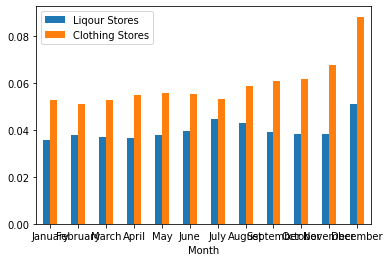

In [10]:
ax = month_averages.plot.bar(x='Month', y=['Liqour Stores','Clothing Stores'], rot=0)

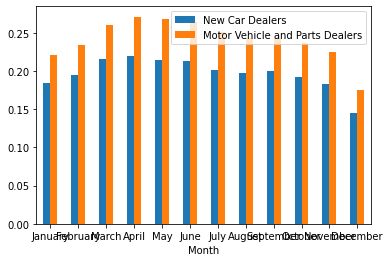

In [11]:
ax = month_averages.plot.bar(x='Month', y=['New Car Dealers','Motor Vehicle and Parts Dealers'], rot=0)